In [ ]:
!pip install gym stable_baselines3


In [ ]:
!pip install stable-baselines3[extra] gym


In [ ]:
!pip install 'shimmy>=0.2.1'


In [ ]:
!pip install pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 38.8 MB/s eta 0:00:00


In [ ]:
import random

# Parameters
num_jobs = 5
job_durations = [10, 3, 20, 8, 1]
num_machines = 3
population_size = 50
generations = 100
crossover_rate = 0.8
mutation_rate = 0.1

# Initialize population
def initialize_population(population_size, num_jobs, num_machines):
    return [[random.randint(0, num_machines - 1) for _ in range(num_jobs)] for _ in range(population_size)]

# Calculate makespan
def calculate_makespan(chromosome, job_durations, num_machines):
    machine_times = [0] * num_machines
    for job, machine in enumerate(chromosome):
        machine_times[machine] += job_durations[job]
    return max(machine_times)

# Selection - Tournament selection
def tournament_selection(population, fitness, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        tournament = [random.choice(range(len(population))) for _ in range(tournament_size)]
        fittest_individual = min(tournament, key=lambda i: fitness[i])
        selected.append(population[fittest_individual])
    return selected

# Crossover - Single point crossover
def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1) - 1)
        return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]
    else:
        return parent1, parent2

# Mutation - Randomly change a job's machine assignment
def mutate(chromosome, num_machines, mutation_rate):
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            chromosome[i] = random.randint(0, num_machines - 1)
    return chromosome

# Main Genetic Algorithm
population = initialize_population(population_size, num_jobs, num_machines)

for generation in range(generations):
    # Calculate fitness for each individual
    fitness = [calculate_makespan(individual, job_durations, num_machines) for individual in population]

    # Selection
    selected = tournament_selection(population, fitness)

    # Crossover
    offspring = []
    for i in range(0, len(selected), 2):
        parent1, parent2 = selected[i], selected[i + 1]
        child1, child2 = crossover(parent1, parent2)
        offspring.extend([child1, child2])

    # Mutation
    population = [mutate(individual, num_machines, mutation_rate) for individual in offspring]

# Find the best solution
best_solution = min(population, key=lambda chrom: calculate_makespan(chrom, job_durations, num_machines))
best_makespan = calculate_makespan(best_solution, job_durations, num_machines)

print("Best Schedule:", best_solution)
print("Best Makespan:", best_makespan)


Best Schedule: [1, 2, 0, 2, 1]
Best Makespan: 20


In [ ]:
import random

# Parameters
num_jobs = 10
job_durations = [10, 3, 20, 8, 1,10, 3, 20, 8, 1]
num_machines = 5
population_size = 50
generations = 100
crossover_rate = 0.8
mutation_rate = 0.1

# Initialize population
def initialize_population(population_size, num_jobs, num_machines):
    return [[random.randint(0, num_machines - 1) for _ in range(num_jobs)] for _ in range(population_size)]

# Calculate makespan and balance
def calculate_makespan_and_balance(chromosome, job_durations, num_machines):
    machine_times = [0] * num_machines
    for job, machine in enumerate(chromosome):
        machine_times[machine] += job_durations[job]
    max_makespan = max(machine_times)
    balance_penalty = sum([(max_makespan - time)**2 for time in machine_times])  # Penalize unbalanced schedules
    return max_makespan + balance_penalty

# Tournament selection
def tournament_selection(population, fitness, tournament_size=3):
    selected = []
    for _ in range(len(population)):
        tournament = [random.choice(range(len(population))) for _ in range(tournament_size)]
        fittest_individual = min(tournament, key=lambda i: fitness[i])
        selected.append(population[fittest_individual])
    return selected

# Crossover - Single point crossover
def crossover(parent1, parent2):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1) - 1)
        return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]
    else:
        return parent1, parent2

# Mutation - Randomly change a job's machine assignment
def mutate(chromosome, num_machines, mutation_rate):
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            chromosome[i] = random.randint(0, num_machines - 1)
    return chromosome

# Function to create a readable schedule from the chromosome
def create_schedule(chromosome, job_durations):
    schedule = {machine: [] for machine in range(num_machines)}
    for job, machine in enumerate(chromosome):
        schedule[machine].append((f"J{job+1}", job_durations[job]))
    return schedule

# Main Genetic Algorithm
population = initialize_population(population_size, num_jobs, num_machines)

for generation in range(generations):
    fitness = [calculate_makespan_and_balance(individual, job_durations, num_machines) for individual in population]
    selected = tournament_selection(population, fitness)
    offspring = []
    for i in range(0, len(selected), 2):
        parent1, parent2 = selected[i], selected[i + 1]
        child1, child2 = crossover(parent1, parent2)
        offspring.extend([child1, child2])
    population = [mutate(individual, num_machines, mutation_rate) for individual in offspring]

# Find the best solution and create schedule
best_solution = min(population, key=lambda chrom: calculate_makespan_and_balance(chrom, job_durations, num_machines))
best_schedule = create_schedule(best_solution, job_durations)
print(best_schedule)
# Displaying the schedule
print("Optimal Schedule:")
for machine, jobs in best_schedule.items():
    job_list = ', '.join([job[0] for job in jobs])
    makespan = sum([job[1] for job in jobs])
    print(f"Machine {machine + 1} - Jobs: {job_list} | Makespan: {makespan} minutes")


{0: [('J4', 8), ('J9', 8)], 1: [('J1', 10), ('J5', 1), ('J7', 3)], 2: [('J2', 3), ('J6', 10), ('J10', 1)], 3: [('J8', 20)], 4: [('J3', 20)]}
Optimal Schedule:
Machine 1 - Jobs: J4, J9 | Makespan: 16 minutes
Machine 2 - Jobs: J1, J5, J7 | Makespan: 14 minutes
Machine 3 - Jobs: J2, J6, J10 | Makespan: 14 minutes
Machine 4 - Jobs: J8 | Makespan: 20 minutes
Machine 5 - Jobs: J3 | Makespan: 20 minutes


In [ ]:
# Revised approach to include the robot cell information in the schedule

# Original schedule
original_schedule = best_schedule

# User input for robot cells
user_input = {
    "R 1": [1, 3],
    "R 2": [2,5],
    "R 3": [4]

}

# Function to find the robot cell for a given machine
def find_robot_cell(machine_number, user_input):
    for cell_name, machines in user_input.items():
        if machine_number in machines:
            return cell_name
    return None

# Adding robot cell information to each schedule
for machine, jobs in original_schedule.items():
    robot_cell = find_robot_cell(machine + 1, user_input)  # +1 because machine numbering starts from 1
    original_schedule[machine] = (robot_cell, jobs)

# Re-arranging the schedule by robot cell
rearranged_schedule = dict(sorted(original_schedule.items(), key=lambda item: item[1][0]))

# Displaying the rearranged schedule
for machine, (cell, jobs) in rearranged_schedule.items():
    job_list = ', '.join([job[0] for job in jobs])
    makespan = sum([job[1] for job in jobs])
    print(f"Machine {machine} (in {cell}) - Jobs: {job_list} | Makespan: {makespan} minutes")

# Return rearranged_schedule for further analysis if needed
rearranged_schedule




Machine 0 (in R 1) - Jobs: J4, J9 | Makespan: 16 minutes
Machine 2 (in R 1) - Jobs: J2, J6, J10 | Makespan: 14 minutes
Machine 1 (in R 2) - Jobs: J1, J5, J7 | Makespan: 14 minutes
Machine 4 (in R 2) - Jobs: J3 | Makespan: 20 minutes
Machine 3 (in R 3) - Jobs: J8 | Makespan: 20 minutes


{0: ('R 1', [('J4', 8), ('J9', 8)]),
 2: ('R 1', [('J2', 3), ('J6', 10), ('J10', 1)]),
 1: ('R 2', [('J1', 10), ('J5', 1), ('J7', 3)]),
 4: ('R 2', [('J3', 20)]),
 3: ('R 3', [('J8', 20)])}

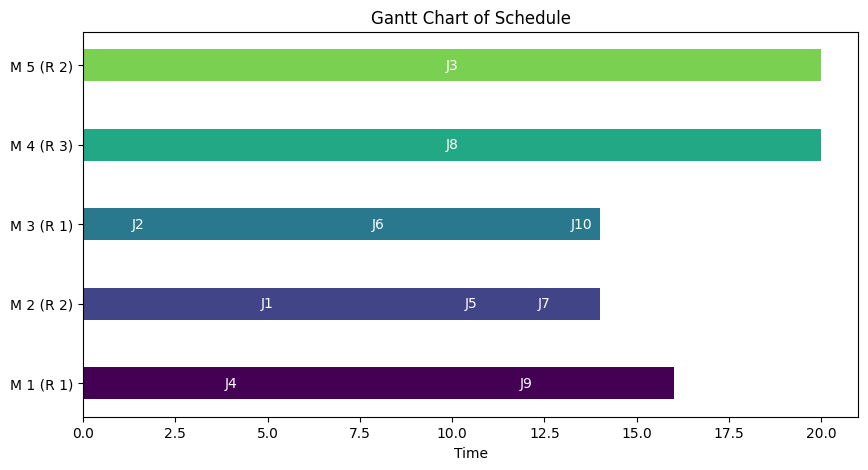

In [2]:
# Correcting the error and updating the Gantt chart code

def plot_gantt_chart(schedule):
    fig, ax = plt.subplots(figsize=(10, 5))
    task_height = 0.4  # Defining task height

    # Extracting machine names and creating a mapping for y-axis labels
    machine_names = {machine: f"M {machine + 1} ({details[0]})" for machine, details in schedule.items()}
    y_labels = [machine_names[machine] for machine in sorted(machine_names)]

    task_colors = {}
    min_label_duration = 1

    for machine in sorted(schedule):
        machine_name, tasks = schedule[machine]
        cumulative_duration = 0
        for task in tasks:
            task_name, task_duration = task
            full_task_name = f"{task_name}"

            if full_task_name not in task_colors:
                task_colors[full_task_name] = plt.cm.viridis(machine / len(schedule))

            start_time = cumulative_duration
            cumulative_duration += task_duration

            ax.barh(y_labels[machine], task_duration, left=start_time, height=task_height, color=task_colors[full_task_name])
            ax.text(start_time + task_duration / 2, y_labels[machine], full_task_name, ha='center', va='center', color='white')

    ax.set_yticks(range(len(y_labels)))
    ax.set_yticklabels(y_labels)
    ax.set_xlabel('Time')
    ax.set_title('Gantt Chart of Schedule')

    plt.show()

# Sample schedule
sample_schedule = {
    0: ('R 1', [('J4', 8), ('J9', 8)]),
    2: ('R 1', [('J2', 3), ('J6', 10), ('J10', 1)]),
    1: ('R 2', [('J1', 10), ('J5', 1), ('J7', 3)]),
    4: ('R 2', [('J3', 20)]),
    3: ('R 3', [('J8', 20)])}

# Plot the Gantt chart
plot_gantt_chart(sample_schedule)


In [ ]:
# Re-defining the original schedule and job subtasks due to code execution state reset

# User input for subtasks of each job
job_subtasks = {
    'J1': [('T1', 4,'S1'), ('T2', 3,'S3'), ('T3', 3),'S4'],
    'J2': [('T1', 3,'S1')],
    'J3': [('T1', 7,'S3'), ('T2', 8,'S4'), ('T3', 5,'S6')],
    'J4': [('T1', 4,'S1'), ('T2', 4,'S3')],
    'J5': [('T1', 1,'S1')],
    'J6': [('T1', 5,'S2'), ('T2', 5,'S3')],
    'J7': [('T1', 1,'S2'), ('T2', 1,'S2'), ('T3', 1,'S1')],
    'J8': [('T1', 10,'S4'), ('T2', 10,'S2')],
    'J9': [('T1', 4,'S1'), ('T2', 4,'S4')],
    'J10': [('T1', 1,'S4')]
}

# Replace jobs with their corresponding subtasks and tools in the schedule
for machine, (cell, jobs) in original_schedule.items():
    new_jobs = []
    for job_info in jobs:
        job, duration = job_info[0], job_info[1]  # Unpack job ID and duration
        if job in job_subtasks:
            for subtask in job_subtasks[job]:
                # Extract task number and job number more safely
                task_number = subtask[0][1:]  # Assuming task format is 'T<number>'
                job_number = job[1:]  # Extracting job number from job ID
                subtask_label = f"T{job_number}{task_number}"  # Correct format: TXY

                tool = subtask[2] if len(subtask) > 2 else 'None'  # Handling missing tool info
                new_jobs.append((subtask_label, subtask[1], tool))
    original_schedule[machine] = (cell, new_jobs)

# Displaying the updated schedule with tools
for machine, (cell, jobs) in original_schedule.items():
    job_list = ', '.join([f"{job[0]} ({job[1]} units, Tool: {job[2]})" for job in jobs])
    print(f"Machine {machine} (in {cell}) - Tasks: {job_list}")

# Return original_schedule for further analysis if needed
original_schedule


Machine 0 (in R 1) - Tasks: T41 (4 units, Tool: S1), T42 (4 units, Tool: S3), T91 (4 units, Tool: S1), T92 (4 units, Tool: S4)
Machine 1 (in R 2) - Tasks: T11 (4 units, Tool: S1), T12 (3 units, Tool: S3), T13 (3 units, Tool: None), T1 (4 units, Tool: None), T51 (1 units, Tool: S1), T71 (1 units, Tool: S2), T72 (1 units, Tool: S2), T73 (1 units, Tool: S1)
Machine 2 (in R 1) - Tasks: T21 (3 units, Tool: S1), T61 (5 units, Tool: S2), T62 (5 units, Tool: S3), T101 (1 units, Tool: S4)
Machine 3 (in R 3) - Tasks: T81 (10 units, Tool: S4), T82 (10 units, Tool: S2)
Machine 4 (in R 2) - Tasks: T31 (7 units, Tool: S3), T32 (8 units, Tool: S4), T33 (5 units, Tool: S6)


{0: ('R 1',
  [('T41', 4, 'S1'), ('T42', 4, 'S3'), ('T91', 4, 'S1'), ('T92', 4, 'S4')]),
 1: ('R 2',
  [('T11', 4, 'S1'),
   ('T12', 3, 'S3'),
   ('T13', 3, 'None'),
   ('T1', '4', 'None'),
   ('T51', 1, 'S1'),
   ('T71', 1, 'S2'),
   ('T72', 1, 'S2'),
   ('T73', 1, 'S1')]),
 2: ('R 1',
  [('T21', 3, 'S1'), ('T61', 5, 'S2'), ('T62', 5, 'S3'), ('T101', 1, 'S4')]),
 3: ('R 3', [('T81', 10, 'S4'), ('T82', 10, 'S2')]),
 4: ('R 2', [('T31', 7, 'S3'), ('T32', 8, 'S4'), ('T33', 5, 'S6')])}

In [ ]:
# Original schedule with robotic cells and tasks


# Filter function for a specific robotic cell
def filter_schedule_by_robot_cell(schedule, cell_name):
    return {machine: (cell, tasks) for machine, (cell, tasks) in schedule.items() if cell == cell_name}

# Example: Filtering for Robotic Cell R1
filtered_schedule_R1 = filter_schedule_by_robot_cell(original_schedule, 'R 1')

# Displaying the filtered schedule for R1
for machine, (cell, tasks) in filtered_schedule_R1.items():
    task_list = ', '.join([f"{task[0]} ({task[1]})" for task in tasks])
    print(f"Machine {machine} (in {cell}) - Tasks: {task_list}")

# Return filtered_schedule_R1 for further analysis if needed
filtered_schedule_R1



Machine 0 (in R 1) - Tasks: T41 (4), T42 (4), T91 (4), T92 (4)
Machine 2 (in R 1) - Tasks: T21 (3), T61 (5), T62 (5), T101 (1)


{0: ('R 1',
  [('T41', 4, 'S1'), ('T42', 4, 'S3'), ('T91', 4, 'S1'), ('T92', 4, 'S4')]),
 2: ('R 1',
  [('T21', 3, 'S1'), ('T61', 5, 'S2'), ('T62', 5, 'S3'), ('T101', 1, 'S4')])}

In [ ]:
def calculate_makespan_and_tool_change(schedule):
    machines = {}
    makespan = 0
    tool_changeover_time = 0

    for _, (job, tasks) in schedule.items():
        current_tool = None
        current_machine = None
        machine_time = 0

        for task in tasks:
            task_id, processing_time, tool = task

            if current_tool is None:
                current_tool = tool
                current_machine = job + current_tool
                machines[current_machine] = 0

            if current_tool != tool:
                tool_changeover_time += 5
                current_tool = tool

            if current_machine != job + current_tool:
                machine_time = machines.get(current_machine, 0)
                current_machine = job + current_tool

            machine_time += processing_time
            machines[current_machine] = machine_time
            makespan = max(makespan, machine_time)

    return makespan, tool_changeover_time

schedule = filtered_schedule_R1

makespan, tool_changeover_time = calculate_makespan_and_tool_change(schedule)

print("Makespan:", makespan)
print("Tool Changeover Time:", tool_changeover_time)

# Remove 'R 1' from each schedule entry
new_schedule = {key: value[1] for key, value in schedule.items()}

print(new_schedule)


Makespan: 16
Tool Changeover Time: 30
{0: [('T41', 4, 'S1'), ('T42', 4, 'S3'), ('T91', 4, 'S1'), ('T92', 4, 'S4')], 2: [('T21', 3, 'S1'), ('T61', 5, 'S2'), ('T62', 5, 'S3'), ('T101', 1, 'S4')]}
